# **1. Perkenalan Dataset**
- Sumber Dataset: - kaggle
- Dataset ini berisi 89.243 baris dan 7 kolom dengan data terkait akun keuangan dari berbagai simbol perusahaan


**isi dari datanya berupa:**
- symbol: Kode perusahaan.
- account: Jenis akun keuangan (misalnya, piutang, hutang, depresiasi, dll.).
- type: Kategori akun (seperti "BS" yang mungkin berarti Balance Sheet).
- 2020 - 2023: Nilai keuangan untuk masing-masing tahun.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files


# **3. Memuat Dataset**

In [2]:
github_url = "https://raw.githubusercontent.com/DickySaragih/Submission_BMLP/refs/heads/main/Dataset_inisiasi.csv"
df = pd.read_csv(github_url)

# **4. Exploratory Data Analysis (EDA)**


In [3]:
# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     83988 non-null  float64
 4   2021     84474 non-null  float64
 5   2022     83634 non-null  float64
 6   2023     69831 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB
None


In [4]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
               2020          2021          2022          2023
count  8.398800e+04  8.447400e+04  8.363400e+04  6.983100e+04
mean   1.197697e+12  1.399118e+12  1.497669e+12  1.714984e+12
std    1.532871e+13  1.717454e+13  1.889606e+13  2.166294e+13
min   -4.127934e+14 -4.826358e+14 -5.610016e+14 -5.709176e+14
25%    0.000000e+00  1.648572e-01  3.511105e-01  8.170234e+04
50%    6.334818e+09  7.411000e+09  8.395047e+09  1.168128e+10
75%    2.220000e+11  2.609188e+11  2.965390e+11  3.485207e+11
max    1.610065e+15  1.725611e+15  1.992545e+15  2.174219e+15


In [5]:
# Cek jumlah nilai unik di kolom kategorikal
print("\nNilai Unik per Kolom Kategorikal:")
for col in ['symbol', 'account', 'type']:
    print(f"{col}: {df[col].nunique()} unique values")



Nilai Unik per Kolom Kategorikal:
symbol: 604 unique values
account: 264 unique values
type: 3 unique values


In [6]:
# Cek missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    return mis_val_table[mis_val_table['Missing Values'] > 0]

print("\nMissing Values Table:")
print(missing_values_table(df))


Missing Values Table:
      Missing Values  % of Total Values
2020            5255           5.888417
2021            4769           5.343836
2022            5609           6.285087
2023           19412          21.751846


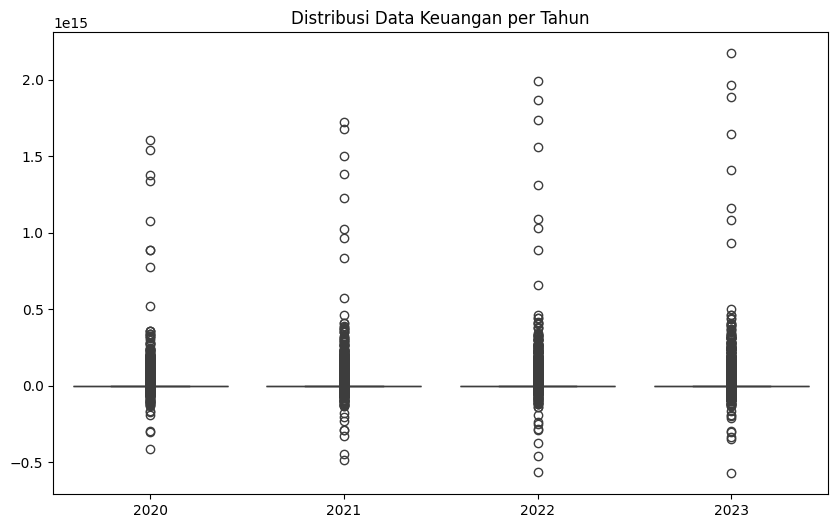

In [7]:
# Visualisasi distribusi data numerik
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 3:])
plt.title("Distribusi Data Keuangan per Tahun")
plt.show()


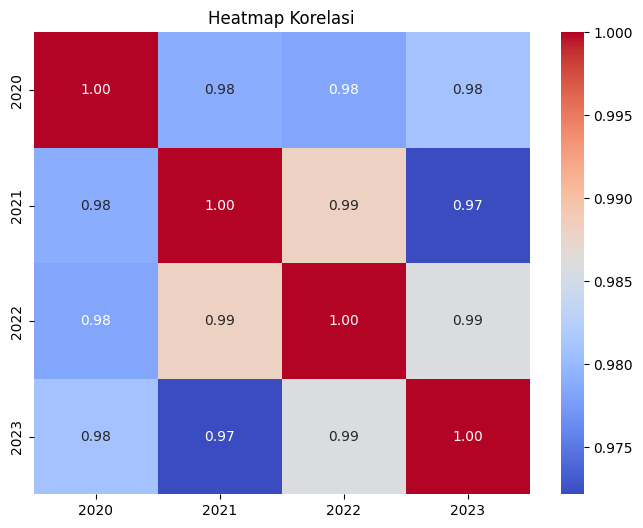

In [8]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 3:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

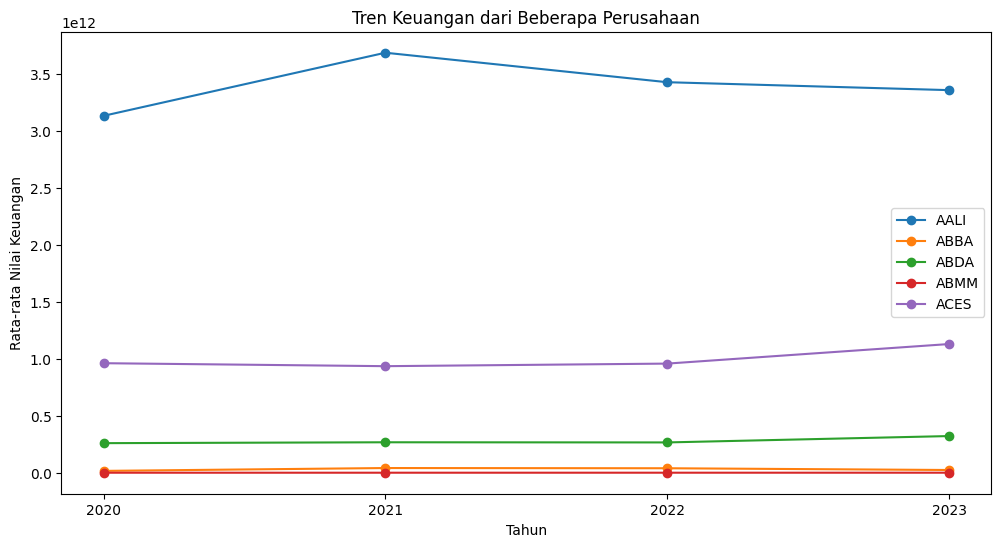

In [9]:
# Visualisasi distribusi nilai keuangan dari beberapa perusahaan contoh
plt.figure(figsize=(12, 6))
sample_companies = df['symbol'].unique()[:5]  # Ambil 5 perusahaan pertama
for company in sample_companies:
    subset = df[df['symbol'] == company]
    plt.plot(['2020', '2021', '2022', '2023'], subset.iloc[:, 3:].mean(), marker='o', label=company)
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Nilai Keuangan")
plt.title("Tren Keuangan dari Beberapa Perusahaan")
plt.legend()
plt.show()


# **5. Data Preprocessing**

In [10]:
# Handling Missing Values (Imputasi dengan Mean)
for col in ['2020', '2021', '2022', '2023']:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-10-4896f84eafdb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
# Encoding Kolom Kategorikal
encoder = LabelEncoder()
df['symbol'] = encoder.fit_transform(df['symbol'])
df['account'] = encoder.fit_transform(df['account'])
df['type'] = encoder.fit_transform(df['type'])

In [13]:
# Normalisasi Data Numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['2020', '2021', '2022', '2023']])

In [14]:
# Menampilkan hasil setelah preprocessing
df_preprocessed = pd.DataFrame(df_scaled, columns=['2020', '2021', '2022', '2023'])
df_preprocessed['symbol'] = df['symbol']
df_preprocessed['account'] = df['account']
df_preprocessed['type'] = df['type']
print("\nHasil Data Setelah Preprocessing:")
print(df_preprocessed.head())


Hasil Data Setelah Preprocessing:
       2020      2021      2022      2023  symbol  account  type
0 -0.028744 -0.022287 -0.014938 -0.045554       0        0     0
1 -0.029041 -0.056315 -0.035474 -0.054299       0        1     0
2 -0.814947 -0.809906 -0.809152 -0.842889       0        2     0
3  0.180310  0.148413  0.130180  0.112930       0        3     0
4 -0.082174 -0.085202 -0.083353 -0.090881       0        4     0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [15]:
#Clustering dengan K-Means ---
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

In [16]:
# Gunakan K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)


## **b. Evaluasi Model Clustering**

In [17]:
# Menampilkan jumlah data per cluster
print("Jumlah data dalam tiap cluster:")
print(df['Cluster'].value_counts())


Jumlah data dalam tiap cluster:
Cluster
0    89058
2      177
1        8
Name: count, dtype: int64


## **c. Visualisasi Hasil Clustering**

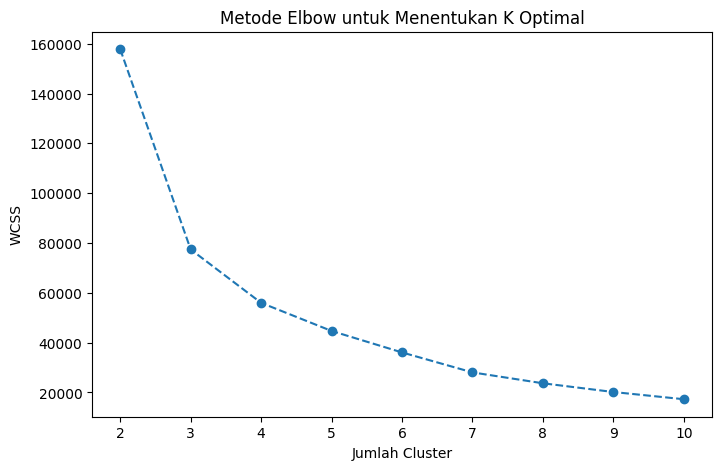

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

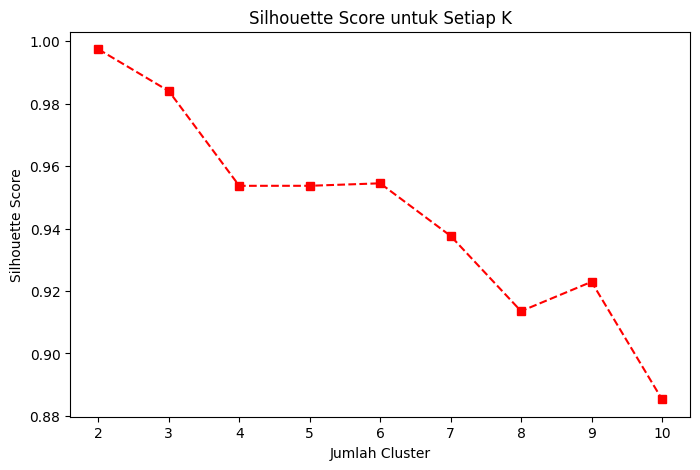

In [19]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap K')
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

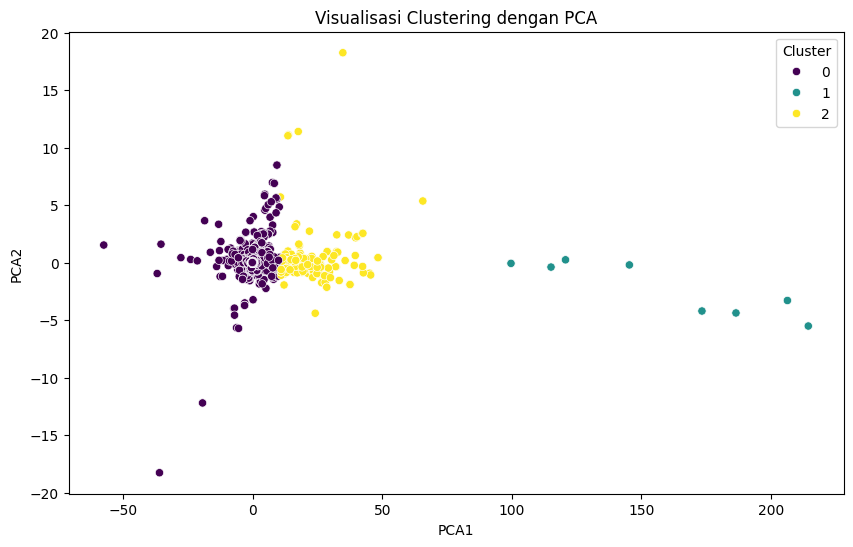

In [20]:
# Visualisasi & Interpretasi

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis')
plt.title('Visualisasi Clustering dengan PCA')
plt.show()

In [21]:
# Menampilkan jumlah data per cluster
print("Jumlah data dalam tiap cluster:")
print(df['Cluster'].value_counts())

Jumlah data dalam tiap cluster:
Cluster
0    89058
2      177
1        8
Name: count, dtype: int64


<ipython-input-22-3dbf3b15d2f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['2023'], palette='viridis')


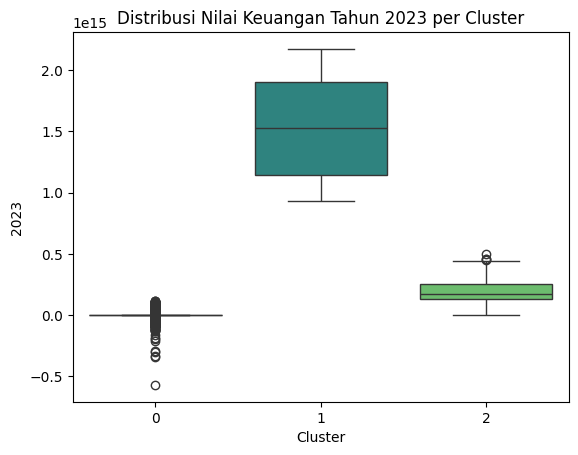

<ipython-input-22-3dbf3b15d2f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df['2020'], palette='viridis')


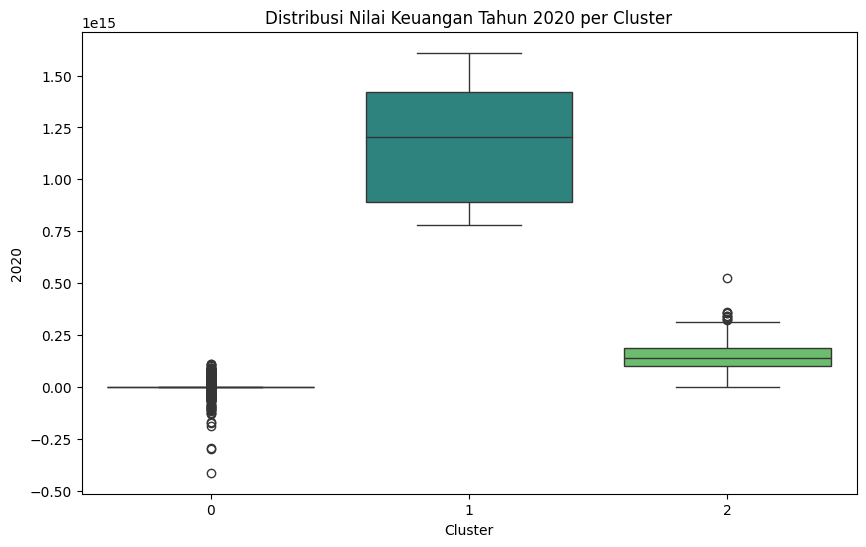


Karakteristik Utama Tiap Cluster:
                 2020          2021          2022          2023
Cluster                                                        
0        7.826181e+11  9.224327e+11  9.782438e+11  1.177095e+12
1        1.188265e+15  1.293814e+15  1.436061e+15  1.533345e+15
2        1.563930e+14  1.828304e+14  1.980089e+14  2.031289e+14


In [22]:
# Visualisasi distribusi cluster berdasarkan fitur utama

sns.boxplot(x=df['Cluster'], y=df['2023'], palette='viridis')
plt.title("Distribusi Nilai Keuangan Tahun 2023 per Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cluster'], y=df['2020'], palette='viridis')
plt.title("Distribusi Nilai Keuangan Tahun 2020 per Cluster")
plt.show()

grouped_df = df.groupby('Cluster')[['2020', '2021', '2022', '2023']].mean()
print("\nKarakteristik Utama Tiap Cluster:")
print(grouped_df)

### Interpretasi Target


##Cluster 1:
Rata-rata nilai tahun 2020-2023: {'2020': 782618055995.5037, '2021': 922432676055.8088, '2022': 978243829519.8365, '2023': 1177094944109.0203}
Cluster ini menunjukkan tren peningkatan keuangan.

##Cluster 2:
Rata-rata nilai tahun 2020-2023: {'2020': 1188265215750000.0, '2021': 1293814433875000.0, '2022': 1436060548625000.0, '2023': 1533344716625000.0}
Cluster ini menunjukkan tren peningkatan keuangan.

##Cluster 3:
Rata-rata nilai tahun 2020-2023: {'2020': 156393034246141.1, '2021': 182830419310075.38, '2022': 198008860992253.38, '2023': 203128878694170.44}
Cluster ini menunjukkan tren peningkatan keuangan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('clustered_data.csv', index=False)